In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/GlobalStore.csv',  encoding='unicode_escape')
data.head()

,Category,City,Country,Customer ID,Customer Name,Market,Order Date,Order ID,Order Priority,Product ID,...,Sales,Segment,Ship Date,Ship Mode,Shipping Cost,State,Sub-Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,US,07-01-2011 00:00,CA-2011-130813,High,OFF-PA-10002005,...,19,Consumer,09-01-2011 00:00,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,US,21-01-2011 00:00,CA-2011-148614,Medium,OFF-PA-10002893,...,19,Consumer,26-01-2011 00:00,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,US,05-08-2011 00:00,CA-2011-118962,Medium,OFF-PA-10000659,...,21,Consumer,09-08-2011 00:00,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,US,05-08-2011 00:00,CA-2011-118962,Medium,OFF-PA-10001144,...,111,Consumer,09-08-2011 00:00,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,US,29-09-2011 00:00,CA-2011-146969,High,OFF-PA-10002105,...,6,Consumer,03-10-2011 00:00,Standard Class,1.32,California,Paper,2011,North America,40


# Exploratory Data Analysis of GlobalStore dataset

In [ ]:
data.shape

(51290, 25)

In [ ]:
data.isnull().sum()

Category          0
City              0
Country           0
Customer ID       0
Customer Name     0
Market            0
Order Date        0
Order ID          0
Order Priority    0
Product ID        0
Product Name      0
Profit            0
Quantity          0
Region            0
Row ID            0
Sales             0
Segment           0
Ship Date         0
Ship Mode         0
Shipping Cost     0
State             0
Sub-Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [ ]:
data.dtypes

Category           object
City               object
Country            object
Customer ID        object
Customer Name      object
Market             object
Order Date         object
Order ID           object
Order Priority     object
Product ID         object
Product Name       object
Profit            float64
Quantity            int64
Region             object
Row ID              int64
Sales               int64
Segment            object
Ship Date          object
Ship Mode          object
Shipping Cost     float64
State              object
Sub-Category       object
Year                int64
Market2            object
weeknum             int64
dtype: object

In [ ]:
data['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [ ]:
data['Category'].value_counts()

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

In [ ]:
data['Sub-Category'].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64

array([[<Axes: title={'center': 'Profit'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Row ID'}>],
       [<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Shipping Cost'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'weeknum'}>, <Axes: >, <Axes: >]],
      dtype=object)

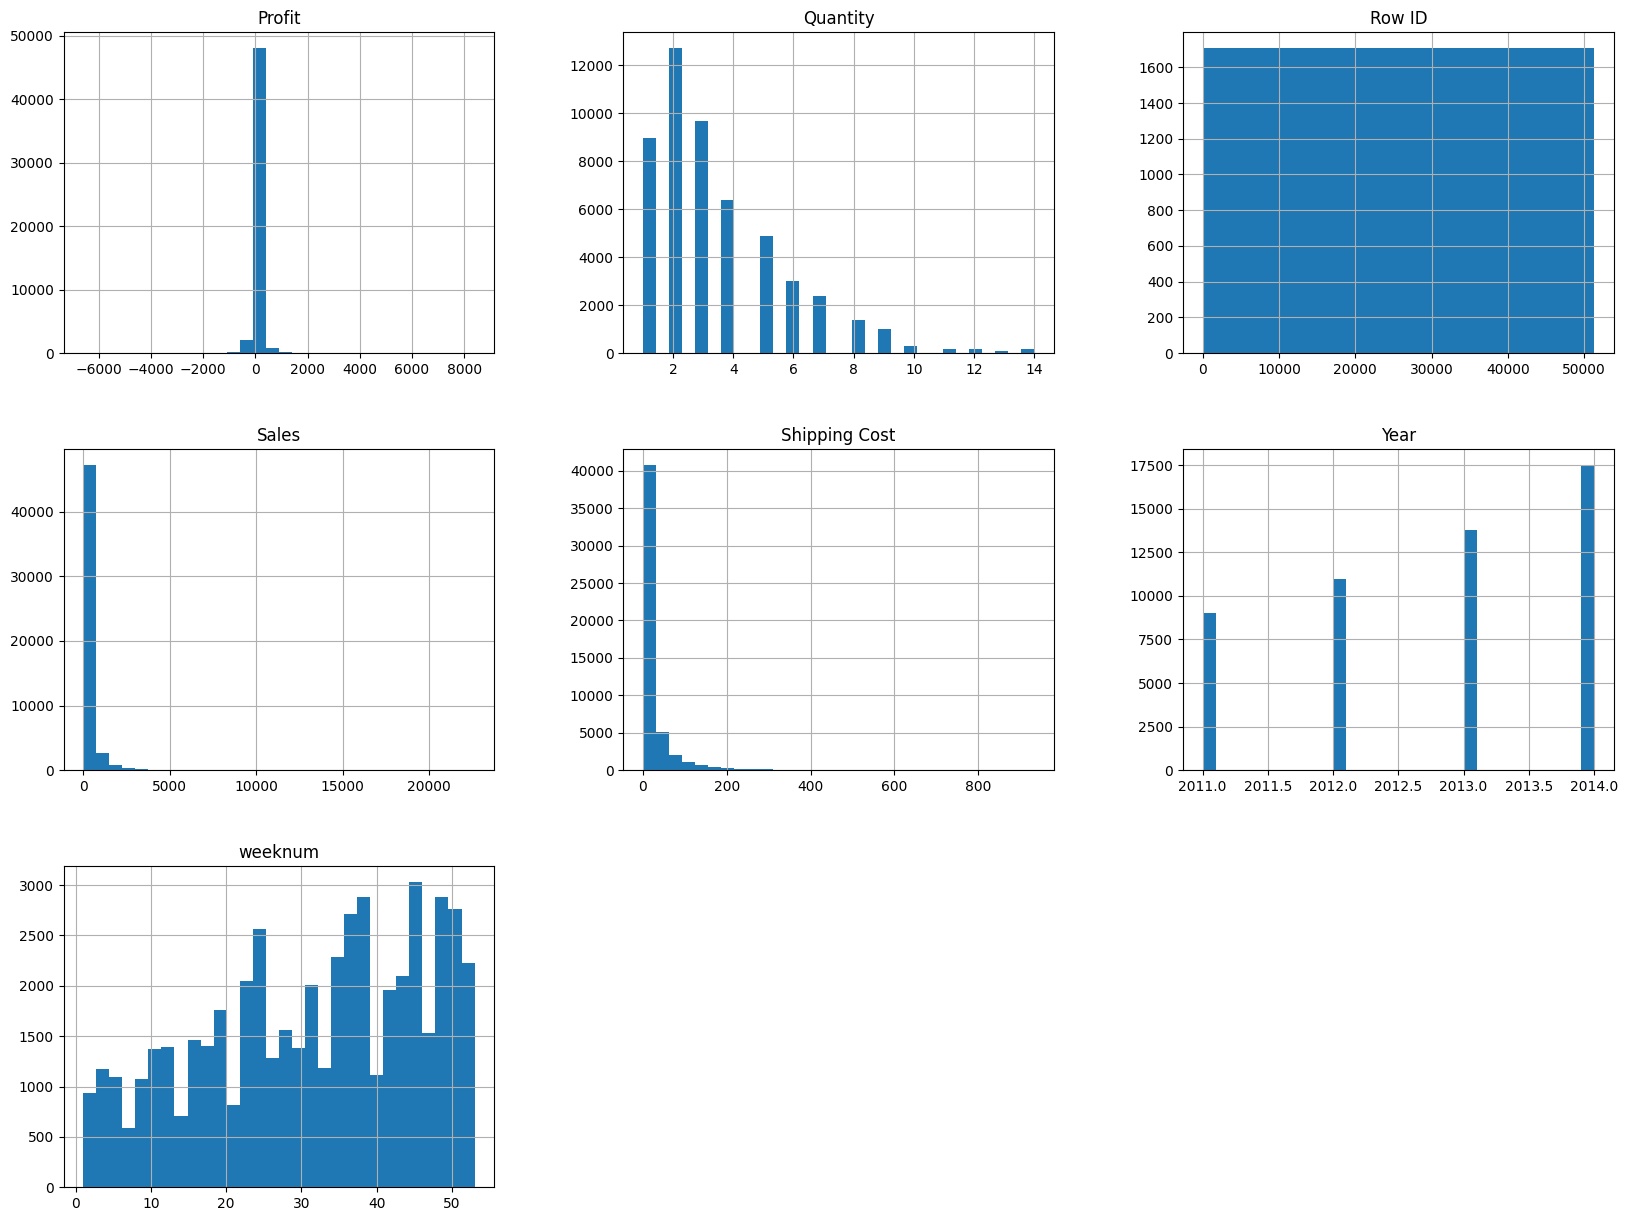

In [ ]:
data.hist(bins = 30, figsize = (20,15))

<ipython-input-10-3e1053752724>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


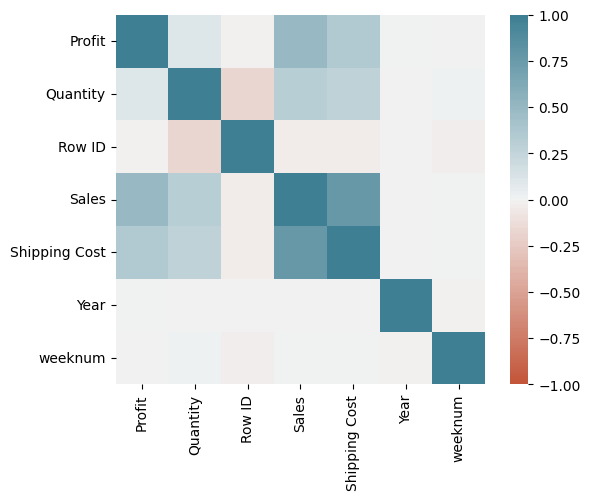

In [ ]:
corr_matrix = data.corr()
ax = sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

<Axes: xlabel='Profit', ylabel='Sales'>

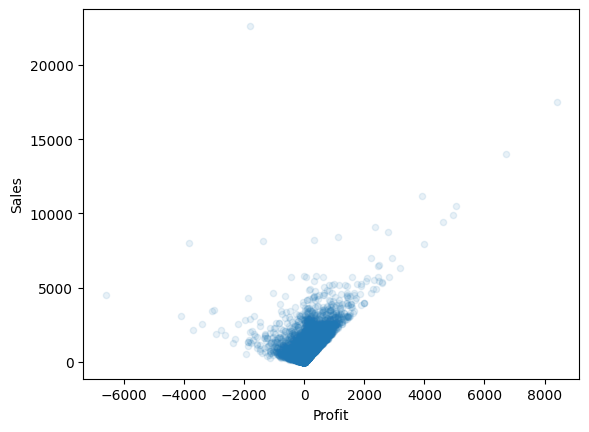

In [ ]:
data.plot(kind = "scatter", x="Profit", y="Sales", alpha=0.1)

# Market Basket Analysis (Using Apriori Algorithm)

In [ ]:
data['single_trans'] = data['Customer ID'].astype(str)+'_'+data['Order Date'].astype(str)
data['single_trans']

0        LS-172304_07-01-2011 00:00
1        MV-174854_21-01-2011 00:00
2        CS-121304_05-08-2011 00:00
3        CS-121304_05-08-2011 00:00
4        AP-109154_29-09-2011 00:00
                    ...            
51285    AM-103604_03-12-2014 00:00
51286    AM-103604_03-12-2014 00:00
51287    HR-147704_18-12-2014 00:00
51288    RM-196754_25-12-2014 00:00
51289    FH-143654_26-12-2014 00:00
Name: single_trans, Length: 51290, dtype: object

In [ ]:
df = pd.crosstab(data['single_trans'], data['Sub-Category'])
df.head()

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
single_trans,,,,,,,,,,,,,,,,,
AA-103151_04-07-2011 00:00,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0
AA-103151_07-01-2014 00:00,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
AA-103151_23-12-2014 00:00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
AA-103151_25-08-2014 00:00,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
AA-103151_31-12-2013 00:00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res

basket_input = df.applymap(encode)

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(basket_input, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.head()

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accessories),(Appliances),0.112679,0.065749,0.007332,0.065066,0.989610,-0.000077,0.999269,-0.011694
1,(Appliances),(Accessories),0.065749,0.112679,0.007332,0.111509,0.989610,-0.000077,0.998682,-0.011113
2,(Art),(Accessories),0.172156,0.112679,0.017761,0.103166,0.915567,-0.001638,0.989392,-0.100231
3,(Accessories),(Art),0.112679,0.172156,0.017761,0.157620,0.915567,-0.001638,0.982745,-0.094145
4,(Accessories),(Binders),0.112679,0.212264,0.022112,0.196242,0.924520,-0.001805,0.980067,-0.084257


In [ ]:
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(8)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
108,(Storage),(Binders),0.178585,0.212264,0.035364,0.198024,0.932915,-0.002543,0.982244,-0.080496
109,(Binders),(Storage),0.212264,0.178585,0.035364,0.166605,0.932915,-0.002543,0.985625,-0.083649
62,(Art),(Binders),0.172156,0.212264,0.032816,0.190617,0.898020,-0.003727,0.973255,-0.120629
63,(Binders),(Art),0.212264,0.172156,0.032816,0.154599,0.898020,-0.003727,0.979233,-0.125997
85,(Art),(Storage),0.172156,0.178585,0.030816,0.179003,1.002335,0.000072,1.000508,0.002815
84,(Storage),(Art),0.178585,0.172156,0.030816,0.172558,1.002335,0.000072,1.000486,0.002837
104,(Paper),(Binders),0.126245,0.212264,0.026151,0.207143,0.975875,-0.000646,0.993541,-0.027515
105,(Binders),(Paper),0.212264,0.126245,0.026151,0.123199,0.975875,-0.000646,0.996526,-0.030428


# This shows the top four sub-categories usually purchased by the GlobalStore Customers




1.   Storage and Binders
2.   Art and Binders
3.   Art and Storage
4.   Paper and Binders

# EDA of Login data entries

In [ ]:
cust = pd.read_csv('/content/Login_data.csv',  encoding='unicode_escape')
cust.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,User ID,Market,market.1,Log in Date
0,JH-159851,APAC,APAC,01-01-2011 00:00
1,CM-122351,APAC,APAC,03-01-2011 00:00
2,DP-133901,APAC,APAC,03-01-2011 00:00
3,KL-166451,APAC,APAC,03-01-2011 00:00
4,KN-164501,APAC,APAC,03-01-2011 00:00


In [ ]:
cust.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(25506, 4)

### These are the customers with highest login

In [ ]:
cust['User ID'].value_counts()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DK-130901    18
EP-139154    17
CS-121751    17
EM-139601    16
JH-159853    15
             ..
SZ-100351     1
JR-62102      1
TC-112952     1
RA-92852      1
LP-70951      1
Name: User ID, Length: 4873, dtype: int64

### This shows the dates on which GlobalStore has the highest amount of Customers

In [ ]:
cust['Log in Date'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


18-06-2014 00:00    60
20-11-2014 00:00    59
25-11-2014 00:00    59
18-11-2014 00:00    56
10-12-2014 00:00    56
                    ..
19-02-2012 00:00     1
03-06-2012 00:00     1
01-07-2012 00:00     1
21-10-2012 00:00     1
09-02-2014 00:00     1
Name: Log in Date, Length: 1430, dtype: int64